# Checkpoint 2
Riley Schaefer<br>
12/02/23

In [1]:
import pandas as pd
import requests
import json
import base64
import urllib
from datetime import datetime
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import sqlite3
from selenium import webdriver
from selenium.webdriver.common.by import By
chinook = sqlite3.connect(r"C:\Users\rjs06\EMAT-Data23\chinook\chinook.db")

***
### Gathering Data
I got this data from the "Reports" function within Wix.com. Using this function, I can gather the data from both the new and the old websites by seting the data to be from spicicic dates. 
***
`tr0` stands for `traffic report - site 0` as in the old site.<br>
`tr1` stands for `traffic report - site 1` as in the new site.<br>
***

In [2]:
tr0 = pd.read_csv("Final Project CSV/traffic-report_site-0.csv")
tr0['Date'] = [datetime.strptime(x, '%b %d, %Y') for x in tr0['Date']]
tr0.sort_values('Date', ascending = True).head()

,Date,Page views,Site sessions,Unique visitors,Bounce rate,Avg. session duration,Avg. pages per session,Avg. time on page
225,2017-12-31,124,43,41,53%,"4m, 58s",2.1,"0m, 57s"
224,2018-01-07,149,46,43,50%,"3m, 3s",2.3,"0m, 43s"
223,2018-01-14,186,52,50,38%,"3m, 37s",2.6,"0m, 41s"
222,2018-01-21,354,79,72,38%,"4m, 27s",2.7,"0m, 45s"
221,2018-01-28,245,67,60,33%,"2m, 37s",2.6,"0m, 32s"


In [3]:
tr1 = pd.read_csv("Final Project CSV/traffic-report_site-1.csv")
tr1['Date'] = [datetime.strptime(x, '%b %d, %Y') for x in tr1['Date']]
tr1.sort_values('Date', ascending = True).head()

,Date,Page views,Site sessions,Unique visitors,Bounce rate,Avg. session duration,Avg. pages per session,Avg. time on page
82,2022-04-24,151,68,53,59%,"4m, 17s",1.6,"1m, 5s"
81,2022-05-01,268,118,96,64%,"6m, 36s",1.5,"1m, 47s"
80,2022-05-08,238,107,78,63%,"8m, 54s",1.5,"1m, 48s"
79,2022-05-15,172,95,77,64%,"3m, 38s",1.3,"1m, 25s"
78,2022-05-22,332,156,113,64%,"10m, 22s",1.4,"2m, 59s"


##### Skewed Data Fix
However, the week of 2022-04-24 is the week that the old site was transfered to the new site. Thus, having significantly decreased data on both site 0 and 1 on that same week, I have removed that week from both data sets.

In [4]:
tr0_df = tr0.sort_values('Date', ascending = True).iloc[0:225]
tr1_df = tr1.sort_values('Date', ascending = True).iloc[1:83]

***
`tsr0` stands for `traffic sources report - site 0` as in the old site.<br>
`tsr1` stands for `traffic sources report - site 1` as in the new site.<br>
***

In [5]:
tsr0 = pd.read_csv("Final Project CSV/traffic-sources-report_site-0.csv")
tsr0.head()

,Traffic category,Traffic source,Site sessions,Page views,Unique visitors,Avg. session duration
0,Organic search,Google,"4,104","16,292","3,270","4m, 29s"
1,Direct,Direct,"2,338","6,445","1,368","3m, 31s"
2,Organic search,Bing,185,793,153,"6m, 31s"
3,Organic search,DuckDuckGo,74,304,68,"4m, 14s"
4,Organic search,Yahoo,76,270,61,"6m, 5s"


In [6]:
tsr1 = pd.read_csv("Final Project CSV/traffic-sources-report_site-1.csv")
tsr1.head()

,Traffic category,Traffic source,Site sessions,Page views,Unique visitors,Avg. session duration
0,Organic search,Google,"6,420","22,035","4,671","5m, 29s"
1,Direct,Direct,"5,810","16,565","2,876","4m, 28s"
2,Organic search,Bing,448,"1,440",313,"5m, 7s"
3,Organic search,DuckDuckGo,209,694,129,"5m, 52s"
4,Organic search,Yahoo,100,284,84,"5m, 46s"


***
### Analysis Plan
For Analysis Plan, you should have justifications for your chosen analysis and starting attempts at the
analysis.
***
### Y = B<sub>0</sub>X<sub>0</sub> + B<sub>0</sub>X<sub>1</sub> + E

I am using this data about the traffic of each site because it will tell me valuble information about both sites. For example, the unique visitors would imply new customers and spreading awereness (hense growth) and the number of site sesssions means how many people look at the website on a weekly basis. The higher these numbers are when compared to the first site, then the website is that much more popular than it was.

Now that I have my data, I can now compile and make comparisons between sites 0 and 1.

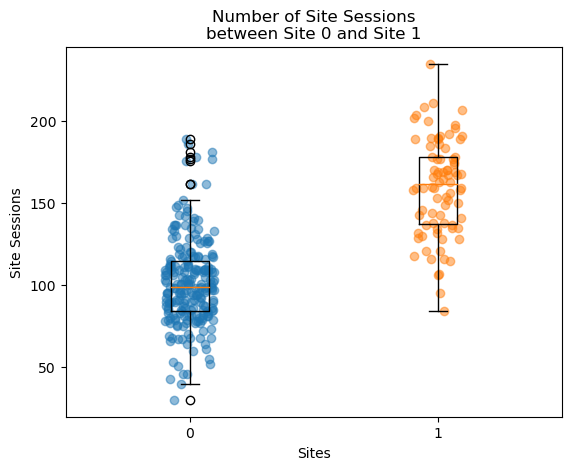

In [22]:
tr0_sessions = tr0_df['Site sessions']
tr1_sessions = tr1_df['Site sessions']

tr0_xs = [0]*len(tr0_sessions)
tr1_xs = [1]*len(tr1_sessions)
tr0_x_jitter = np.random.uniform(-0.10, 0.10, len(tr0_xs))
tr1_x_jitter = np.random.uniform(-0.10, 0.10, len(tr1_xs))


fig1, ax1 = plt.subplots()
ax1.boxplot(tr0_sessions, positions = [0])
ax1.boxplot(tr1_sessions, positions = [1])
ax1.scatter(tr0_xs + tr0_x_jitter, tr0_sessions, alpha = 0.5)
ax1.scatter(tr1_xs + tr1_x_jitter, tr1_sessions, alpha = 0.5)

ax1.set_title('Number of Site Sessions\nbetween Site 0 and Site 1')
ax1.set_xlabel('Sites')
ax1.set_ylabel('Site Sessions')
plt.show()

### Plan
I want to add:
- a `Grouped bar chart` with labels
- a `histogram (hist) function`
- a `scatterplot based on time` overlaid with both sites